In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dat = pickle.load(open("classification_params", 'rb'))

In [3]:
true, prob, N = dat.values()

0.9004668521267305


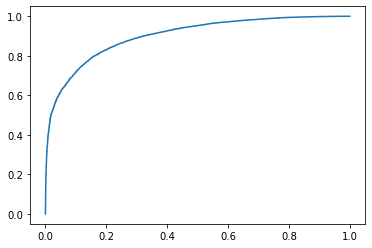

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
x, y, _ = roc_curve(true, prob)
print(roc_auc_score(true, prob))
plt.plot(x, y)

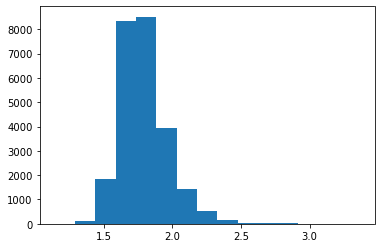

In [16]:
plt.hist(np.log10(N), bins = 15);
# plt.xscale("log")

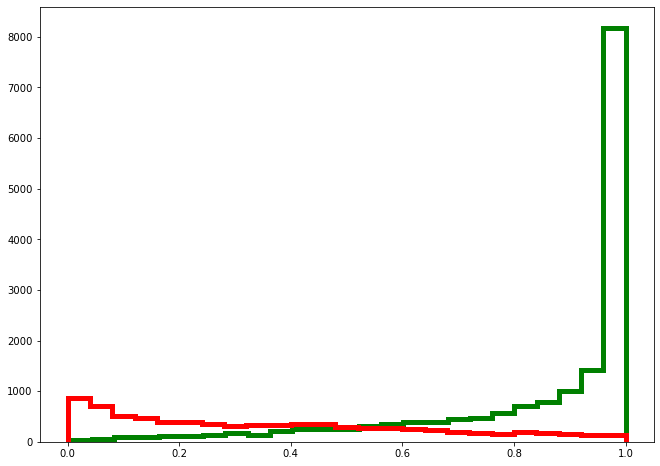

In [22]:
fig, ax = plt.subplots(figsize = (11, 8))

ax.hist(prob[true == 1], histtype = "step", color = "green", bins = 25, linewidth = 5);
ax.hist(prob[true == 0], histtype = "step", color = "red", bins = 25, linewidth = 5);

In [24]:
N_sort = np.sort(N)
true_s = true[np.argsort(N)]
prob_s = prob[np.argsort(N)]

In [35]:
step_size = 2500
Ns, N_sig, AUCs = [], [], []
for step in np.arange(0, len(N), step_size):
    Ns.append( np.mean(N_sort[step: step + step_size]) )
    N_sig.append( np.std(N_sort[step: step + step_size]) )
    AUCs.append(roc_auc_score(true_s[step:step+step_size], prob_s[step:step+step_size]))

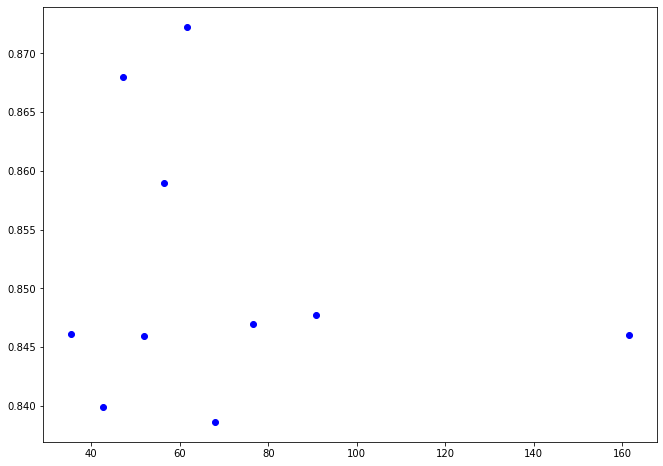

In [37]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(Ns, AUCs, 'bo')